In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from modules.md_utils import coord_initiales_ion, complementaire, longueur_file, longueur_intro

# 1ère partie, états finaux des N ions

In [87]:
N_simu = 2
E_incident= 50 #eV
T_set = 300 #K
theta_incident = 0 #Degree
phi_incident = 0 #Degree
nb_step = 250
dt = 1.e-3 #ps
ion="Ar"
notebook_adress = os.getcwd()

In [88]:
# Préparation de la config
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
os.system("make clean")
os.system("make md2")

# Tout est stocké dans un nv fichier
if os.path.exists('cf3_test'):
    os.system('rm -r cf3_test')
os.makedirs('cf3_test')
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test")
os.makedirs('ion')
os.makedirs('cfg')
os.makedirs('clu')
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
os.system("cp -R cfg/ cf3_test/cfg")
os.system("cp md2 cf3_test/md2")

0

In [89]:
# Run
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test")

command="./md2 -oc cfg/####.cfg -ion "+ ion
command+=" -ionE " + str(E_incident) + " -Tset " + str(T_set) + " -ionT " + str(theta_incident)
command+=" -ionP " + str(phi_incident) + " -tau " + str(0.01) +" -n " + str(nb_step) 
command+=" -dt " + str(dt) + " +dtv " + " -i1 " + str(N_simu) 
#command+=" > log 􏰬&"

print(os.getcwd())
print("")
print(command)

os.system(command)

/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test

./md2 -oc cfg/####.cfg -ion Ar -ionE 50 -Tset 300 -ionT 0 -ionP 0 -tau 0.01 -n 250 -dt 0.001 +dtv  -i1 2


0

In [90]:
# Extraction données

for i in range(N_simu):
    path = r"/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test/ion/"+complementaire(i)+".ion"
    long=longueur_file(path)
    if i==0:
        df=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]")
    else:
        line=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]")
        frames = [df, line]
        df = pd.concat(frames)
    
df.drop(['Time step', 'Integration time', '#b'], axis='columns', inplace=True)
df.reset_index()

/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,index,KE/TE_i,internal PE,external PE,d.x,d.y,d.z,norm(d)
0,0,0.030643,0.0,0.241277,0.52746,-1.09210,-7.58995,7.68624
1,0,0.040113,0.0,0.090631,4.79957,-3.81399,-7.09776,9.37873


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


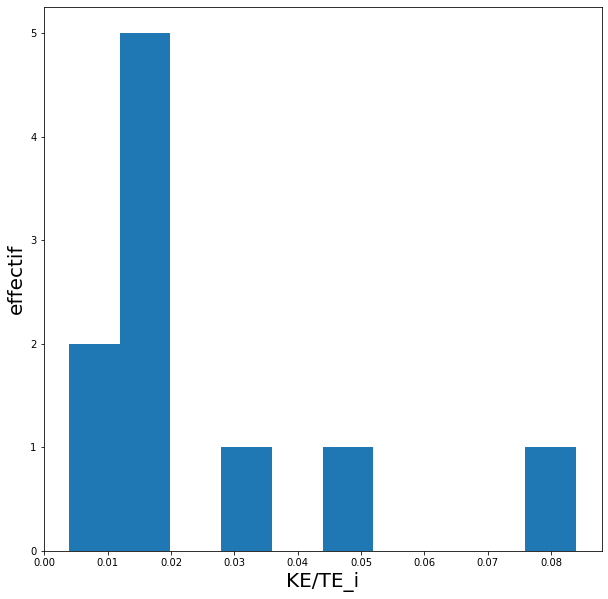

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.hist(df['KE/TE_i'])
ax.set_xlabel('KE/TE_i',size=20)
ax.set_ylabel('effectif',size=20)

fig.show()

# 2ème partie, étude détaillée d'une trajectoire

In [112]:
E_incident= 100 #eV
T_set = 300 #K
theta_incident = 0 #Degree
phi_incident = 12 #Degree
nb_step = 20000
ion="CF3"
dt = 1.e-5 #ps

In [113]:
# Préparation de la config
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
os.system("make clean")
os.system("make md2")

# Tout est stocké dans un nv fichier
if os.path.exists('cf3_test_2'):
    os.system('rm -r cf3_test_2')
os.makedirs('cf3_test_2')
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test_2")
os.makedirs('ion')
os.makedirs('cfg')
os.makedirs('clu')
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
os.system("cp -R cfg/ cf3_test_2/cfg")
os.system("cp md2 cf3_test_2/md2")

0

In [114]:
# Run
os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test_2")

command="./md2 -oc cfg/####.cfg -ion "+ ion
command+=" -ionE " + str(E_incident) + " -Tset " + str(T_set) + " -ionT " + str(theta_incident)
command+=" -ionP " + str(phi_incident) + " -tau " + str(0.01) +" -n " + str(nb_step) 
command+=" -dt " + str(dt) + " +dtv " + " -i1 1"
#command+=" > log 􏰬&"

print(os.getcwd())
print("")
print(command)

os.system(command)

/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test_2

./md2 -oc cfg/####.cfg -ion CF3 -ionE 100 -Tset 300 -ionT 0 -ionP 12 -tau 0.01 -n 20000 -dt 1e-05 +dtv  -i1 1


0

In [115]:
# Extraction données
path = r"/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/cf3_test_2/ion/0001.ion"
df=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=longueur_intro(path)+1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]")

xini,yini,zini=coord_initiales_ion(path)
df['x']=xini+df['d.x']
df['y']=yini+df['d.y']
df['z']=zini+df['d.z']

df.drop(['#b','d.x', 'd.y','d.z'], axis='columns', inplace=True)
df.set_index('Time step')

/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



41


,Integration time,KE/TE_i,internal PE,external PE,norm(d),x,y,z
Time step,,,,,,,,
0,0.00000,1.000000,-14.5136,0.0000,0.00000,-3.37310,-2.29549,14.89137
1,0.00001,1.000000,-14.5136,0.0000,0.00167,-3.37310,-2.29549,14.88970
2,0.00002,1.000000,-14.5136,0.0000,0.00334,-3.37310,-2.29549,14.88803
3,0.00003,1.000000,-14.5136,0.0000,0.00502,-3.37310,-2.29549,14.88635
4,0.00004,1.000000,-14.5136,0.0000,0.00669,-3.37310,-2.29549,14.88468
...,...,...,...,...,...,...,...,...
19996,0.19996,0.055025,0.0000,-10.1109,7.21751,-4.50113,-3.09002,7.80697
19997,0.19997,0.055016,0.0000,-10.1117,7.21757,-4.50126,-3.09021,7.80695
19998,0.19998,0.055006,0.0000,-10.1125,7.21763,-4.50140,-3.09040,7.80694


In [116]:
fig = go.Figure(
        data=go.Scatter3d(
            x=df['x'], 
            y=df['y'], 
            z=df['z'], 
            marker=dict(
                size=2,
                color=df['KE/TE_i'],
                colorscale='magma'
                ),
            line=dict(
                color='darkblue',
                width=2
                )
            )
        )

fig.update_layout(
    width=1000, 
    height=700, 
    scene = dict( 
        xaxis_title='X (A)',
        yaxis_title='Y (A)',
        zaxis_title='Z (A)'
        ),
    margin=dict(
        r=0, 
        b=100, 
        l=0, 
        t=100
        ),
    plot_bgcolor='white'
    )

fig.show()

In [117]:
dx=df['x'].values[-1]-df['x'].values[-2]
dy=df['y'].values[-1]-df['y'].values[-2]
dz=df['z'].values[-1]-df['z'].values[-2]
dr=np.sqrt(dx**2+dy**2+dz**2)

theta_sortie=np.arccos(dz/dr)*180/np.pi
phi_sortie=np.arctan(dy/dx)*180/np.pi

print(theta_sortie)
print(phi_sortie)

94.9650735380833
55.61965527605913
